In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

import allinone as aio

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option("display.float_format", "{:.3f}".format)
plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (10, 6)

| Variable | Description                                                                                            |
|----------|--------------------------------------------------------------------------------------------------------|
| Bad      | 1 = customer defaulted on the loan or is seriously delinquent 0 = customer is current on loan payments |
| CLAge    | Age of oldest credit line in months                                                                    |
| CLNo     | Number of credit lines                                                                                 |
| DebtInc  | Debt-to-income ratio                                                                                   |
| Delinq   | Number of delinquent credit lines                                                                      |
| Derog    | Number of major derogatory reports                                                                     |
| Job      | Occupational category                                                                                  |
| Loan     | Requested loan amount                                                                                  |
| MortDue  | Amount due on existing mortgage                                                                        |
| nInq     | Number of recent credit inquiries                                                                      |
| Reason   | DebtCon = debt consolidation HomeImp = home improvement                                                |
| Value    | Value of current property                                                                              |
| YoJ      | Years at present job                                                                                   |

Style görünümü için [nbviewer](https://nbviewer.jupyter.org/github/Kodluyoruz-Ankara-Veri-Bilimi/muratacikgoz/blob/master/2_hmelq.ipynb) üzerinden inceleyin!

In [3]:
df = pd.read_csv('hmelq.csv')
df.bad.replace(0, 'no', inplace = True)
df.bad.replace(1, 'yes', inplace = True)

In [4]:
df.head(3)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,no,81200,18834.000,108355.000,HomeImp,NaN,28.000,0.000,0.000,139.140,0.000,14.000,34.042
1,no,12600,103960.000,127384.000,DebtCon,NaN,2.000,0.000,0.000,129.020,0.000,25.000,34.479
2,no,18000,46865.000,61266.000,DebtCon,NaN,5.000,0.000,0.000,102.590,2.000,9.000,26.354


### Önbilgiler

In [20]:
aio.describe(df)

,dtype,count,mean,std,min,median,max,null,zero,unique,freq,top,upout,lowout
bad,object,3576,NaN,NaN,NaN,NaN,NaN,0,0.000%,2,2863,no,NaN,NaN
loan,int64,3576,18529.698,11262.834,1100,16200.000,89900,0,0.000%,474,65,15000,4.334%,0.000%
mortdue,float64,3262,74013.908,44016.834,2619.000,65858.000,399550.000,314,0.000%,3095,6,50000.000,3.747%,0.000%
value,float64,3512,101076.923,54865.275,8800.000,89183.000,850000.000,64,0.000%,3302,9,80000.000,5.537%,0.000%
reason,object,3429,NaN,NaN,NaN,NaN,NaN,147,0.000%,2,2371,DebtCon,NaN,NaN
job,object,3409,NaN,NaN,NaN,NaN,NaN,167,0.000%,6,1431,Other,NaN,NaN
yoj,float64,3264,8.833,7.568,0.000,7.000,41.000,312,6.907%,86,247,0.000,1.370%,0.000%
derog,float64,3149,0.262,0.865,0.000,0.000,10.000,427,75.671%,11,2706,0.000,12.388%,0.000%
delinq,float64,3225,0.433,1.099,0.000,0.000,15.000,351,70.386%,12,2517,0.000,19.799%,0.000%
clage,float64,3397,179.833,87.066,0.490,173.640,1168.230,179,0.000%,3050,7,102.500,0.951%,0.000%


### Null Grafiği

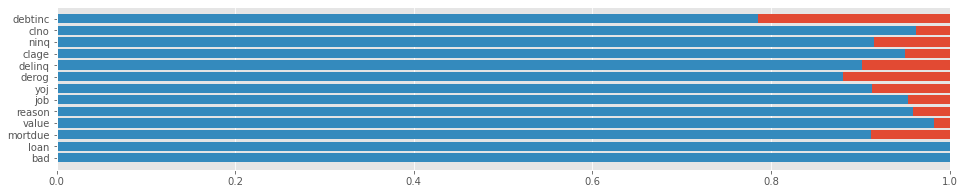

In [21]:
plt.figure(figsize=(16,3))
aio.nullbar(df)

- En çok null değer debtinc kolonunda görünüyor, sayısal değerlere oranla object null değerler azınlıkta kalıyor.
- Hedef değişkeninde ve istenen loan miktarında null değer bulunmamaktadır.

### Uniq Değerler

In [17]:
aio.unique(df)

bad : ['no' 'yes']
--------------------------------------------------------------------------------
reason : ['HomeImp' 'DebtCon' nan]
--------------------------------------------------------------------------------
job : [nan 'Mgr' 'Office' 'Other' 'ProfEx' 'Sales' 'Self']
--------------------------------------------------------------------------------
yoj : [28.    2.    5.   19.   17.    4.   26.   16.   14.   25.    3.    8.
  6.   10.   15.   18.    7.     nan 27.    3.8   8.5   0.    1.   13.
 11.    9.   21.   12.   20.   29.   22.   23.   30.   24.    2.5   9.9
 31.    0.8   1.5   3.5   0.5   5.5   0.2   0.4  36.   35.    0.1   7.5
  1.9   1.3   0.9  14.4  28.5  10.5   0.3  22.8  12.6   2.3   4.5  33.
  0.6   9.3   3.9   6.6  17.6   1.6  41.    7.2   0.25  2.6  34.    5.6
  9.2   9.5   9.8   6.5   3.2   4.6   2.9  24.5  19.5  17.5   4.3   0.7
  7.4   1.8   2.2 ]
--------------------------------------------------------------------------------
derog : [ 0.  1. nan  2.  3.  4.  6.

### Korelasyon

In [143]:
df.iloc[:,1:].corr().style.background_gradient(axis=None)

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
loan,1.000000,0.229546,0.337453,0.123293,-0.001463,-0.021577,0.089030,0.048633,0.092377,0.093636
mortdue,0.229546,1.000000,0.873280,-0.089949,-0.053310,-0.004971,0.141236,0.029452,0.340139,0.167358
value,0.337453,0.873280,1.000000,0.002501,-0.057279,-0.011014,0.182226,-0.005191,0.290439,0.134187
yoj,0.123293,-0.089949,0.002501,1.000000,-0.073500,0.065401,0.184283,-0.067735,0.017809,-0.052290
derog,-0.001463,-0.053310,-0.057279,-0.073500,1.000000,0.234706,-0.083755,0.163750,0.048631,0.032324
delinq,-0.021577,-0.004971,-0.011014,0.065401,0.234706,1.000000,0.044245,0.081166,0.151996,0.076943
clage,0.089030,0.141236,0.182226,0.184283,-0.083755,0.044245,1.000000,-0.113367,0.221071,-0.042852
ninq,0.048633,0.029452,-0.005191,-0.067735,0.163750,0.081166,-0.113367,1.000000,0.097669,0.133751
clno,0.092377,0.340139,0.290439,0.017809,0.048631,0.151996,0.221071,0.097669,1.000000,0.180983
debtinc,0.093636,0.167358,0.134187,-0.052290,0.032324,0.076943,-0.042852,0.133751,0.180983,1.000000


- En yüksek korele mortdue ve value arasında gözlemleniyor.
- Genel tabloya bakılırsa, aralarındaki ilişki oldukça düşük görünüyor. Yoğun renkler malvarlığı ve ipotekte yer almaktadır.

### Kayıp Değerler

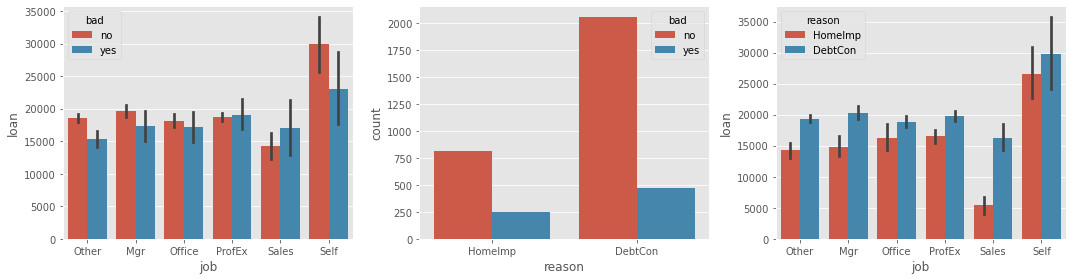

In [24]:
fig, ax = plt.subplots(1, 3, figsize = (15, 4))
sns.barplot(x='job', y='loan', hue='bad', data=dfCopy, ax=ax[0])
sns.countplot('reason', hue='bad', data=dfCopy, ax=ax[1])
sns.barplot(x='job', y='loan', hue='reason', data=dfCopy, ax=ax[2])
plt.tight_layout()

In [54]:
dfCopy = df.copy()

In [55]:
dfCopy['reason'].fillna('DebtCon', inplace = True)
dfCopy['job'].fillna('Other', inplace = True)
dfCopy['derog'].fillna(0, inplace = True)
dfCopy['delinq'].fillna(0, inplace = True)

for col in dfCopy.isnull().sum()[dfCopy.isnull().sum() != 0].index:
    jr_mean = pd.DataFrame(dfCopy.groupby(['job','reason'])[col].mean())
    for j in dfCopy.job.unique():
        for i in dfCopy.reason.unique():
            dfCopy.loc[dfCopy[col].isna() == True, col] = jr_mean.xs((j,i))[0]
            
dfCopy.yoj = dfCopy.yoj.round(1)
dfCopy.clno = dfCopy.clno.round(0)
dfCopy.ninq = dfCopy.ninq.round(0)
#dfCopy.yoj.replace(0, 0.00001, inplace = True)

- Borç (reason) sebebi nan olanlar, kişisel eğilimde olduğu düşünülüerek DebtCon olarak değiştirildi.
- İş (job) değeri nan olanlar, bilinmediğinden Other olarak değiştirildi.
- Uygunsuz rapor (derog) değeri nan olanlar, hiç raporu olmadığı düşünülerek 0 olarak değiştirildi.
- Geciktirilmiş borç (delinq) değeri nan olanlar, hiç borcu olmadığı varsayılarak 0 olarak değiştirildi.
- Geri kalan nan değerler job ve reason'a göre gruplandırılarak, grup içi ortalama değer ile değiştirildi.
- Son olarak gerekli yuvarlamalar yapıldı.

### Kategorik Eğilim

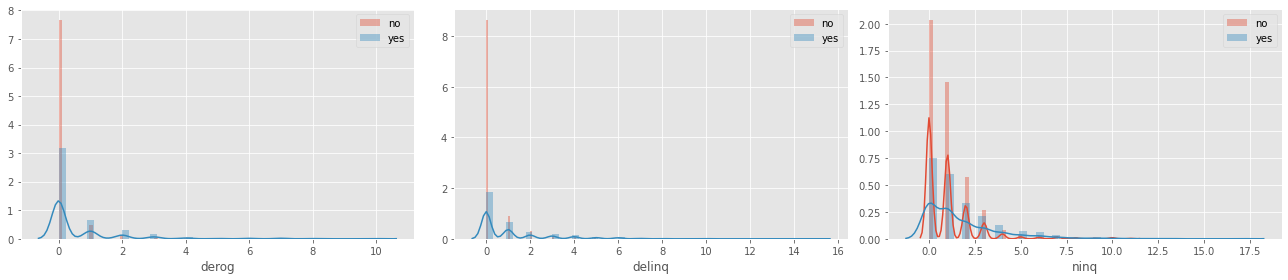

In [13]:
plt.figure(figsize=(18, 4))
for i, col in enumerate(['derog','delinq','ninq'], 1):
    plt.subplot(1, 3, i)
    sns.distplot(dfCopy[col][dfCopy.bad == 'no'], label='no', hist=True)
    sns.distplot(dfCopy[col][dfCopy.bad == 'yes'], label='yes', hist=True)
    plt.tight_layout()
    plt.legend()

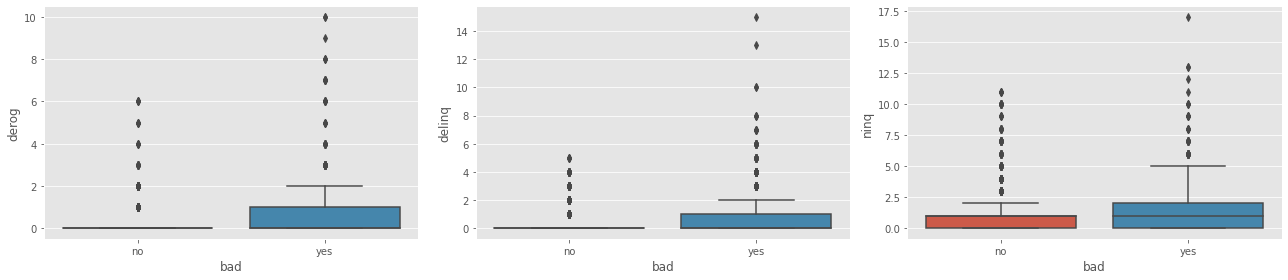

In [155]:
plt.figure(figsize=(18, 4))
for i, col in enumerate(['derog','delinq','ninq'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(dfCopy.bad, (dfCopy[col]))
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(18, 4))
for i, col in enumerate(['derog','delinq','ninq'], 1):
    plt.subplot(1, 3, i)
    randNorm = np.random.normal(np.mean(dfCopy[col]), np.std(dfCopy[col]), len(dfCopy[col]))
    sns.regplot(np.sort(randNorm), np.sort(dfCopy[col]))
    plt.xlabel(f'{col}')
    #plt.yticks(rotation=60, ha='right')
    plt.tight_layout()

In [144]:
aio.describe(dfCopy[['derog','delinq','ninq']])

,dtype,count,mean,std,min,median,max,null,zero,unique,freq,top,upout,lowout
derog,object,3576,NaN,NaN,NaN,NaN,NaN,0,0.000%,2,3133,dg0,NaN,NaN
delinq,object,3576,NaN,NaN,NaN,NaN,NaN,0,0.000%,2,2868,dl0,NaN,NaN
ninq,object,3576,NaN,NaN,NaN,NaN,NaN,0,0.000%,2,2057,nq1,NaN,NaN


In [180]:
def catDerog(col):
    if col == 0:
        return 'dg0'
    if col >= 1 and col < 3:
        return 'dg1'
    if col >= 3:
        return 'dg2'
    
def catDelinq(col):
    if col == 0:
        return 'dl0'
    if col >= 1 and col < 3:
        return 'dl1'
    if col >= 3:
        return 'dl2'
    
def catNinq(col):
    if col == 0:
        return 'nq0'
    if col >= 1 and col < 3:
        return 'nq1'
    if col >= 3 and col < 6:
        return 'nq2'
    if col >= 6:
        return 'nq3'
    
dfCopy['derog_l'] = dfCopy.apply(lambda dfCopy:catDerog(dfCopy.derog), axis=1)
dfCopy['delinq_l'] = dfCopy.apply(lambda dfCopy:catDelinq(dfCopy.delinq), axis=1)
dfCopy['ninq_l'] = dfCopy.apply(lambda dfCopy:catNinq(dfCopy.ninq), axis=1)

In [136]:
def catDerog(col):
    if col == 0:
        return 0
    if col >= 1 :
        return 1
    
def catDelinq(col):
    if col == 0:
        return 0
    if col >= 1:
        return 1

def catNinq(col):
    if col == 0:
        return 0
    if col >= 1:
        return 1
    
dfCopy['derog'] = dfCopy.apply(lambda dfCopy:catDerog(dfCopy.derog), axis=1)
dfCopy['delinq'] = dfCopy.apply(lambda dfCopy:catDelinq(dfCopy.delinq), axis=1)
dfCopy['ninq'] = dfCopy.apply(lambda dfCopy:catNinq(dfCopy.ninq), axis=1)

In [88]:
pd.crosstab(dfCopy.delinq, dfCopy.bad)

bad,0,1
delinq,,
0.000,2469,399
1.000,258,140
2.000,85,57
3.000,27,42
4.000,20,31
5.000,4,17
6.000,0,15
7.000,0,5
8.000,0,3


In [140]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   object 
 1   loan     3576 non-null   int64  
 2   mortdue  3576 non-null   float64
 3   value    3576 non-null   float64
 4   reason   3576 non-null   object 
 5   job      3576 non-null   object 
 6   yoj      3576 non-null   float64
 7   derog    3576 non-null   object 
 8   delinq   3576 non-null   object 
 9   clage    3576 non-null   float64
 10  ninq     3576 non-null   object 
 11  clno     3576 non-null   float64
 12  debtinc  3576 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 363.3+ KB


- Grafikler ve tablolar incelendiğinde 3 sütun kategorik eğilim göstermektedir.
- İstatistiksel değerleri incelenerek, eşik değerlerine göre etiketlendi.

### Grafikler

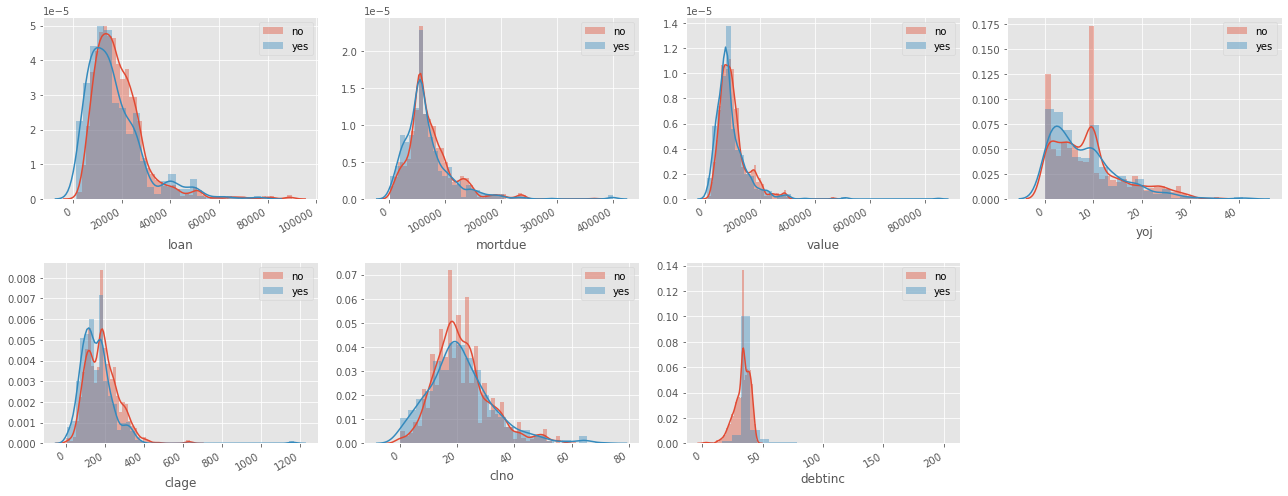

In [127]:
plt.figure(figsize=(18, 7))
for i, col in enumerate(dfCopy.select_dtypes(exclude=['object']).columns[:], 1):
    plt.subplot(2, 4, i)
    sns.distplot(dfCopy[col][dfCopy.bad == 'no'], label='no', hist=True)
    sns.distplot(dfCopy[col][dfCopy.bad == 'yes'], label='yes', hist=True)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.legend()

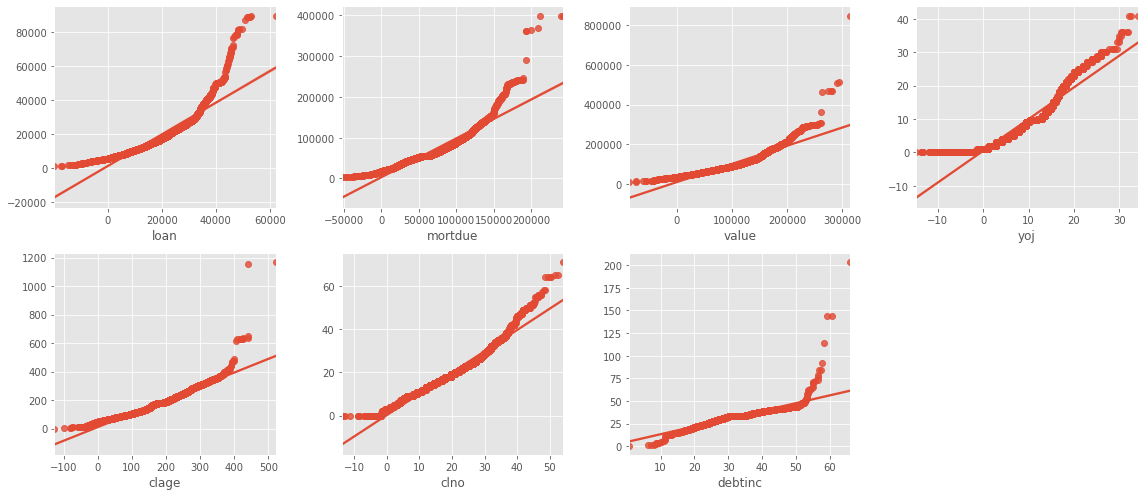

In [219]:
plt.figure(figsize=(16, 7))
for i, col in enumerate(dfCopy.select_dtypes(exclude=['object']).columns[:], 1):
    plt.subplot(2, 4, i)
    randNorm = np.random.normal(np.mean(dfCopy[col]), np.std(dfCopy[col]), len(dfCopy[col]))
    sns.regplot(np.sort(randNorm), np.sort(dfCopy[col]))
    plt.xlabel(f'{col}')
    #plt.yticks(rotation=60, ha='right')
    plt.tight_layout()

- Bad olan müşterilerin raporları ve geçiktirilmiş borçları olduğu gözlemlendi.
- Borç/gelir oranı kredi alabiliritesi olan müşteriler için dağılım sergilerken, 1 olanlar için dağılım gözlemlenmiyor.
- Normale en yakın görüş, clno değerlerinde, ama p-value incelemek gerekir.
- derog, delinq ve ninq kategorik eğilim göstermektedir.
- Genel olarak bakılırsa, sağa çarpık grafikler gözlemlendi, ama şekil olarak düzgün (normal) oldukları söylenebilir.  

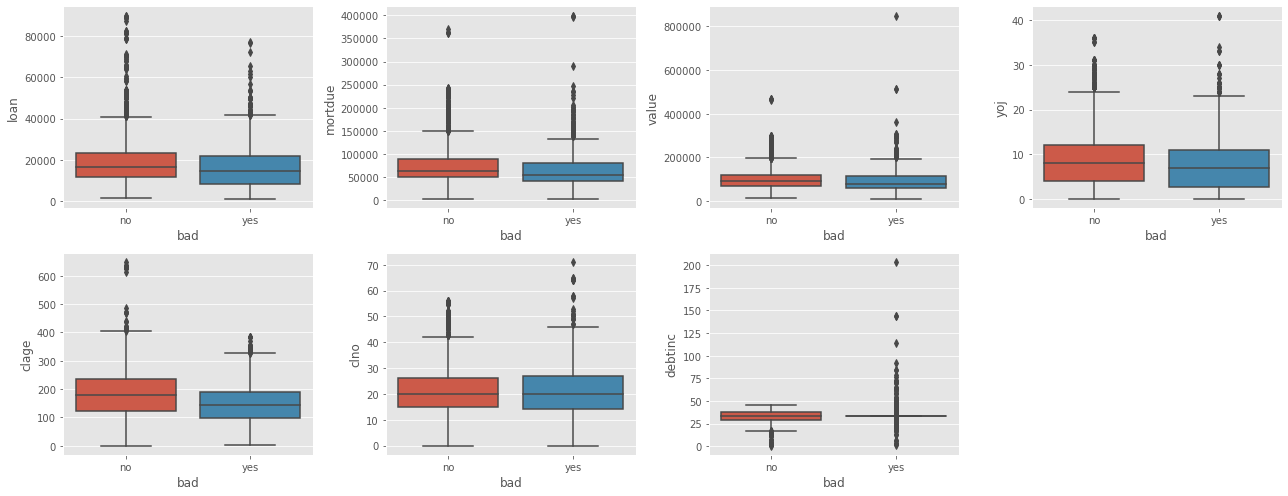

In [79]:
plt.figure(figsize=(18, 7))
for i, col in enumerate(dfCopy.select_dtypes(exclude=['object']).columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(dfCopy.bad, (dfCopy[col]))
    plt.tight_layout()

- Yoğun olarak aykırı değer gözlenmektedir, qqplot grfiklerinden de görülmekteydi.
- Hedef değişkene göre clno, mortdue ve value benzer varyansa sahiptir.

In [37]:
pd.crosstab(dfCopy[dfCopy.yoj == 0].bad, dfCopy[dfCopy.yoj == 0].job)

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
no,17,47,106,38,4,1
yes,5,2,23,3,1,0


In [43]:
aio.describe(dfCopy[(dfCopy.yoj == 0) & (dfCopy.bad == 'yes')][['mortdue','value']])

,dtype,count,mean,std,min,median,max,null,zero,unique,freq,top,upout,lowout
mortdue,float64,34,66807.011,46407.822,14000.000,55528.045,247500.000,0,0.000%,27,8,55528.045,11.765%,0.000%
value,float64,34,76289.510,45390.258,11702.000,72997.166,190797.000,0,0.000%,31,4,77000.332,11.765%,0.000%


- İş tecrübesi olmayan müşterilerin azınlığına kredi verilmiş.
- İş tecrübesi olmayan 34 kişi kredi alabilmiş, teminat olarak mal varlıkları düşünüldüğü için 0.1 değiştirmesi yapılmadı.

In [102]:
dfCopy[dfCopy.yoj == 0].job.value_counts()

Other     129
Office     49
ProfEx     41
Mgr        22
Sales       5
Self        1
Name: job, dtype: int64

In [77]:
dfCopy.loc[dfCopy.clage > 1000,'clage'] = dfCopy[(dfCopy.bad == 'yes') & (dfCopy.clage < 1000)].clage.max()

- En eski kredi kredi üzerinden geçen zaman (clage) sorgulandığında 100 yıllık değerler gözlemlendi, harici max değerler ile değiştirildi.

### p-Value

In [57]:
from scipy.stats import levene

p_value = pd.DataFrame()
for col in dfCopy.columns[1:]:
    p_value.loc[col,'dtype'] = dfCopy[col].dtypes
    if dfCopy[col].dtypes != object:
        p_value.loc[col,'shapiro'] = (stats.shapiro((dfCopy[col]))[1])
        p_value.loc[col,'levene'] = (levene(dfCopy[col][dfCopy.bad == 'no'], dfCopy[col][dfCopy.bad == 'yes'])[1])
        
        if (levene(dfCopy[col][dfCopy.bad == 'no'], dfCopy[col][dfCopy.bad == 'yes'])[1]) > 0.05:
            p_value.loc[col,'ttest_ind'] = (stats.ttest_ind(dfCopy[col][dfCopy.bad == 'no'], dfCopy[col][dfCopy.bad == 'yes'],equal_var=True)[1])
        else:
            p_value.loc[col,'ttest_ind'] = (stats.ttest_ind(dfCopy[col][dfCopy.bad == 'no'], dfCopy[col][dfCopy.bad == 'yes'],equal_var=False)[1])
            
    elif dfCopy[col].dtypes == object:
        p_value.loc[col,'chi2'] = (stats.chi2_contingency(pd.crosstab(dfCopy.bad, dfCopy[col]))[1])

In [58]:
def color_negative(val):
    color = 'red' if val > 0.05 else 'black'
    return 'color: %s' % color
p_value.style.applymap(color_negative, subset=['shapiro','levene','ttest_ind','chi2'])

,dtype,shapiro,levene,ttest_ind,chi2
loan,int64,0.000000,0.011830,0.000047,nan
mortdue,float64,0.000000,0.931290,0.001051,nan
value,float64,0.000000,0.594313,0.000162,nan
reason,object,nan,nan,nan,0.002837
job,object,nan,nan,nan,0.000000
yoj,float64,0.000000,0.567084,0.001905,nan
derog,int64,0.000000,0.000000,0.000000,nan
delinq,int64,0.000000,0.000000,0.000000,nan
clage,float64,0.000000,0.252185,0.000000,nan
ninq,int64,0.000000,0.000000,0.000000,nan


Hedef değişkene göre;
- Shapiro testi için hiçbiri normal dağılım sergilemiyor.
- Levene testi için kırmızı olanlar aynı varyansa sahip değerlerdir. >0.05
- Bağımsız ttesti için clno ile anlamlı bir farklılık yoktur, kredi onayı diğer değerler için anlamlı-belirleyici bulunuyor.
- Kategorik değişkenler için de anlamlı farklılık gözlemlendi.

In [64]:
print(stats.chi2_contingency(pd.crosstab(dfCopy.bad, dfCopy['derog']))[1])
print(stats.chi2_contingency(pd.crosstab(dfCopy.bad, dfCopy['delinq']))[1])
print(stats.chi2_contingency(pd.crosstab(dfCopy.bad, dfCopy['ninq']))[1])

1.7845199149345972e-53
3.1128552067717975e-73
8.079489750122305e-08


### ttest

In [136]:
def ttest_value(df):
    dfNum = df.select_dtypes(exclude=['object'])
    dfttest = pd.DataFrame()
    for idx in dfNum.columns[1:]:
        for col in dfNum.columns[1:]:
            if (levene(dfNum[idx][dfCopy.bad == 'no'], dfNum[col][dfCopy.bad == 'yes'])[1]) > 0.05:
                stat, p = stats.ttest_ind(dfNum[idx][dfCopy.bad == 'no'], dfNum[col][dfCopy.bad == 'yes'],equal_var=True)
                dfttest.loc[idx+str('_no'), col+str('_yes')] = p
            else:
                stat, p = stats.ttest_ind(dfNum[idx][dfCopy.bad == 'no'], dfNum[col][dfCopy.bad == 'yes'],equal_var=False)
                dfttest.loc[idx+str('_no'), col+str('_yes')] = p              
    return dfttest

ttest_value(dfCopy).style.applymap(color_negative)

,mortdue_yes,value_yes,yoj_yes,derog_yes,delinq_yes,clage_yes,ninq_yes,clno_yes,debtinc_yes
mortdue_no,0.001051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
value_no,0.000000,0.000162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
yoj_no,0.000000,0.000000,0.001905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
derog_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
delinq_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
clage_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ninq_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
clno_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.605163,0.000000
debtinc_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### levene

In [100]:
from scipy.stats import levene

def levene_value(df):
    dfNum = df.select_dtypes(exclude=['object'])
    dflev = pd.DataFrame()
    for idx in dfNum.columns[1:]:
        for col in dfNum.columns[1:]:
            stat, p = levene(dfNum[idx][dfCopy.bad == 'no'], dfNum[col][dfCopy.bad == 'yes'])
            dflev.loc[idx+str('_no'), col+str('_yes')] = p
    return dflev

levene_value(dfCopy).style.applymap(color_negative)

,mortdue_yes,value_yes,yoj_yes,clage_yes,clno_yes,debtinc_yes
mortdue_no,0.931290,0.000000,0.000000,0.000000,0.000000,0.000000
value_no,0.000001,0.594313,0.000000,0.000000,0.000000,0.000000
yoj_no,0.000000,0.000000,0.567084,0.000000,0.000000,0.000000
clage_no,0.000000,0.000000,0.000000,0.024948,0.000000,0.000000
clno_no,0.000000,0.000000,0.000000,0.000000,0.000004,0.000000
debtinc_no,0.000000,0.000000,0.010772,0.000000,0.000000,0.000045


### ? yoj ve clno

In [ ]:
dfCopy[dfCopy.yoj == 0].bad.value_counts()

- yoj ve clno için 0 olan değerler var. Bu müşterilerin kayıtları bulunmayabilir.

In [235]:
aio.describe(dfCopy[dfCopy.yoj == 0])
#aio.describe(dfCopy[dfCopy.clno == 0])

,dtype,count,mean,std,min,median,max,dupe,null,zero,unique,freq,top,upout,lowout
bad,object,247,NaN,NaN,NaN,NaN,NaN,0,0,0.000%,2,213,no,NaN,NaN
loan,int64,247,16515.385,8035.987,4000,15300.000,49500,0,0,0.000%,154,5,12100,1.215%,0.000%
mortdue,float64,247,68085.463,34164.837,5627.000,62405.000,247500.000,0,0,0.000%,220,28,55528.045,8.907%,2.429%
value,float64,247,89676.220,39572.254,11702.000,89061.000,229116.000,0,0,0.000%,244,4,77000.332,7.692%,0.000%
reason,object,247,NaN,NaN,NaN,NaN,NaN,0,0,0.000%,2,203,DebtCon,NaN,NaN
job,object,247,NaN,NaN,NaN,NaN,NaN,0,0,0.000%,6,129,Other,NaN,NaN
yoj,float64,247,0.000,0.000,0.000,0.000,0.000,0,0,100.000%,1,247,0.000,0.000%,0.000%
derog,object,247,NaN,NaN,NaN,NaN,NaN,0,0,0.000%,3,201,dg0,NaN,NaN
delinq,object,247,NaN,NaN,NaN,NaN,NaN,0,0,0.000%,3,198,dg0,NaN,NaN
clage,float64,247,168.369,80.880,0.490,173.320,356.310,0,0,0.000%,221,26,179.109,0.000%,0.000%


- clno = 0 için clage çok yüksek görünüyor. 100 yıl!

In [200]:
dfCopy[dfCopy.yoj == 0].job.value_counts()

Other     129
Office     49
ProfEx     41
Mgr        22
Sales       5
Self        1
Name: job, dtype: int64

### histogram

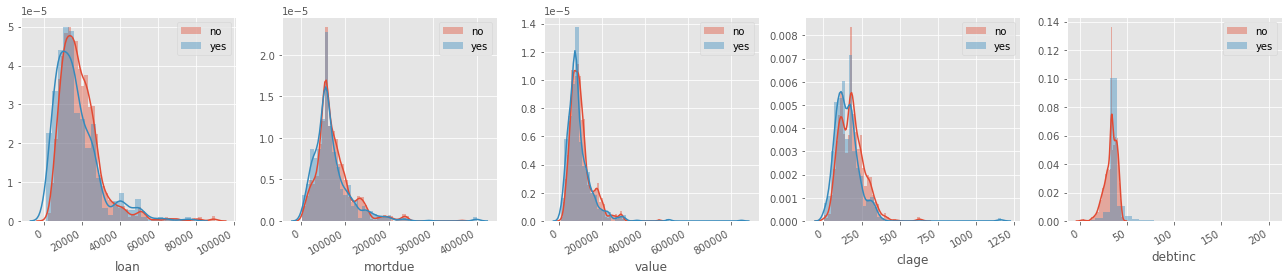

In [236]:
plt.figure(figsize=(18, 4))
for i, col in enumerate(['loan', 'mortdue', 'value', 'clage', 'debtinc'], 1):
    plt.subplot(1, 5, i)
    sns.distplot((dfCopy[col][dfCopy.bad == 'no']), label='no', hist=True)
    sns.distplot((dfCopy[col][dfCopy.bad == 'yes']), label='yes', hist=True)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.legend()

#### sqrt

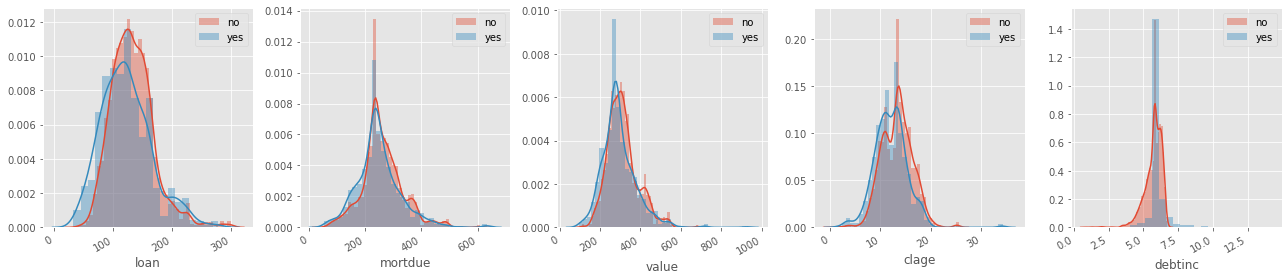

In [213]:
plt.figure(figsize=(18, 4))
for i, col in enumerate(['loan', 'mortdue', 'value', 'clage', 'debtinc'], 1):
    plt.subplot(1, 5, i)
    sns.distplot(np.sqrt(dfCopy[col][dfCopy.bad == 'no']), label='no', hist=True)
    sns.distplot(np.sqrt(dfCopy[col][dfCopy.bad == 'yes']), label='yes', hist=True)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.legend()

#### log

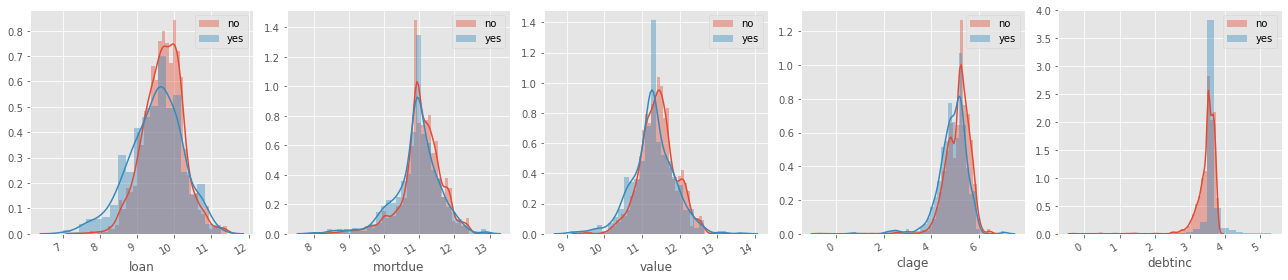

In [8]:
plt.figure(figsize=(18, 4))
for i, col in enumerate(['loan', 'mortdue', 'value', 'clage', 'debtinc'], 1):
    plt.subplot(1, 5, i)
    sns.distplot(np.log(dfCopy[col][dfCopy.bad == 'no']), label='no', hist=True)
    sns.distplot(np.log(dfCopy[col][dfCopy.bad == 'yes']), label='yes', hist=True)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.legend()

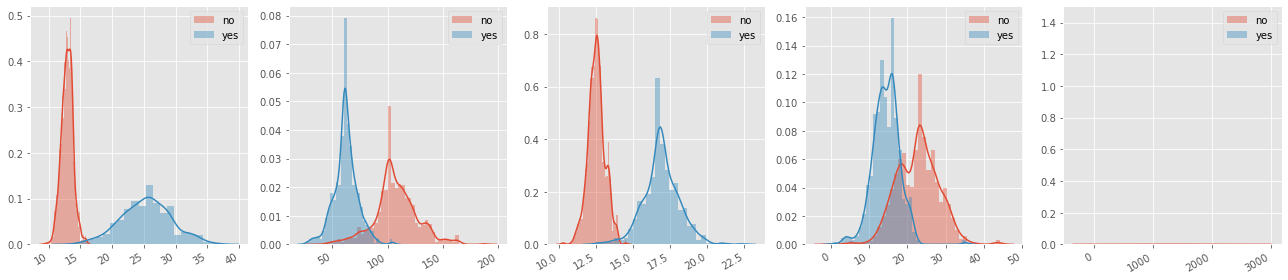

In [49]:
from scipy import stats

plt.figure(figsize=(18, 4))
for i, col in enumerate(['loan', 'mortdue', 'value', 'clage', 'debtinc'], 1):
    plt.subplot(1, 5, i)
    sns.distplot(stats.boxcox(dfCopy[col][dfCopy.bad == 'no'])[0], label='no', hist=True)
    sns.distplot(stats.boxcox(dfCopy[col][dfCopy.bad == 'yes'])[0], label='yes', hist=True)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.legend()

In [122]:
for col in ['loan', 'mortdue', 'value', 'clage', 'debtinc']:
    dfCopy[col] = (stats.boxcox(dfCopy[col])[0])

- aykırı değerileri değiştiriyor (boxplot)
- boxplot -> aykırı değerler, histogram 

In [230]:
aio.describe(dfCopy[dfCopy.clno == 0])

,dtype,count,mean,std,min,median,max,dupe,null,zero,unique,freq,top,upout,lowout
bad,object,33,NaN,NaN,NaN,NaN,NaN,0,0,0.000%,2,21,no,NaN,NaN
loan,int64,33,21827.273,13832.441,4000,16800.000,49500,0,0,0.000%,33,1,36800,0.000%,0.000%
mortdue,float64,33,59407.412,31529.712,9000.000,55528.045,159500.000,0,0,0.000%,21,13,55528.045,21.212%,0.000%
value,float64,33,79320.152,45372.661,40150.000,58338.000,230000.000,0,0,0.000%,33,1,71904.000,21.212%,0.000%
reason,object,33,NaN,NaN,NaN,NaN,NaN,0,0,0.000%,2,24,DebtCon,NaN,NaN
job,object,33,NaN,NaN,NaN,NaN,NaN,0,0,0.000%,3,30,Other,NaN,NaN
yoj,float64,33,4.403,4.755,0.000,3.000,16.000,0,0,33.333%,9,11,0.000,0.000%,0.000%
derog,object,33,NaN,NaN,NaN,NaN,NaN,0,0,0.000%,1,33,dg0,NaN,NaN
delinq,object,33,NaN,NaN,NaN,NaN,NaN,0,0,0.000%,2,32,dg0,NaN,NaN
clage,float64,33,238.644,238.028,179.109,179.109,1168.230,0,0,0.000%,3,31,179.109,6.061%,0.000%


## Sonuç

- Veriye ilk gözatıldığında her değişken için nan değerler bulunuyordu. Bunlar drop edilirse yaklaşık %30'luk veri kaybı yaşanıyordu. Kayıp değerler en optimize şekilde dolduruldu. 
- İlişki tabloları incelendiğinde çok yüksek korelesyon gösteren değişkenler bulunmamaktaydı, PCA birleştirmelerine ihtiyaç duyulmadı.
- Kategorik eğilim gösterdiğini düşündüğümüz değişkenler incelendi, ama sıralı ilişki belirtikleri için etiketleme yapılmadı.
- Değişkenler aykırı değerlerden kaynaklı normal dağılım sergileyememekteydi. Gerekirse bu sorun log, sqrt, boxcox dönüşümleriyle yıkılabilir.
- İş çalışma geçmişi olmayan (sigortasız) ve kredi geçmişi olmayan veriler bulunmakta, teminatları var olduğu düşünülerek değişiklik yapılmadı.
- Anlamlılık sonuçlarından, kredi sayısı hedef değişken için anlamsız sonuçlar gösterdi. Diğer değişkenler hedef için belirleyiciydi. Kategorik eğilim gösterenler, iki varyasyon için anlamlı sonuç verdi.

In [ ]:
dfCopy.to_csv('hmelq_clean.csv',index=False)